# Índice
1. [Generación de datos aleatorios](#Generación-de-datos-aleatorios)
2. [Visualización de los datos](#Visualización-de-los-datos)
3. [Aplicación del algoritmo K-means](#Aplicación-del-algoritmo-K-means)
4. [Método del Codo](#Método-del-Codo)
5. [Distancia intra-cluster](#Distancia-intra-cluster)
6. [Métricas de Validación](#Métricas-de-Validación)
7. [Gráfica Comparativa de Índices de Validación](#Gráfica-Comparativa-de-Índices-de-Validación)
8. [Análisis predictivo](#Análisis-predictivo)
9. [Análisis de la varianza intra-cluster](#Análisis-de-la-varianza-intra-cluster)
10. [Técnicas de materia utilizadas en el análisis](#Técnicas-de-materia-utilizadas-en-el-análisis)
11. [Librerías utilizadas](#Librerías-utilizadas)


In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


    Aquí vamos a generar los datos aleatorios, simulando cuatro grupos de puntos alrededor de diferentes medias. Esto simulará el conjunto de datos con 4 clusters.

## Generación de datos aleatorios

In [37]:
# Código para generar los datos aleatorios...

np.random.seed(42) #Esto establece una "semilla" para el generador de números aleatorios de NumPy.
num_points = 100   #Definimos cuántos puntos (o filas) queremos generar para cada grupo.

# Coordenadas en torno a las medias para cuatro grupos
group1 = np.random.normal(loc=[5, 5], scale=1.0, size=(num_points, 2))
group2 = np.random.normal(loc=[15, 15], scale=1.0, size=(num_points, 2))
group3 = np.random.normal(loc=[5, 15], scale=1.0, size=(num_points, 2))
group4 = np.random.normal(loc=[15, 5], scale=1.0, size=(num_points, 2))

# Concatenamos los grupos para tener un solo conjunto de datos
data = np.vstack([group1, group2, group3, group4])

# Convertimos los datos a un DataFrame para mejor manipulación
df = pd.DataFrame(data, columns=['x', 'y'])
print(df)

             x         y
0     5.496714  4.861736
1     5.647689  6.523030
2     4.765847  4.765863
3     6.579213  5.767435
4     4.530526  5.542560
..         ...       ...
395  15.429618  5.207688
396  15.271579  3.723251
397  13.918943  6.053153
398  14.960445  5.681501
399  15.028318  5.029756

[400 rows x 2 columns]


    Estamos generando cuatro grupos de datos. Cada grupo se genera a partir de una distribución normal con una media (loc) y una desviación estándar (scale) específica para cada grupo.

    1. loc=[5, 5]: La media de la distribución normal. Significa que los datos de este grupo estarán centrados alrededor del punto (5, 5) en el plano X e Y.

    2. scale=1.0: La desviación estándar de la distribución. Controla la dispersión de los datos alrededor del punto medio. Un valor de 1 significa que los datos estarán bastante cerca del centro.

    3. size=(num_points, 2): Esto especifica que queremos generar 100 puntos en dos dimensiones (x, y).
    
    4. np.vstack() toma varios arrays y los "apila" verticalmente (uno debajo del otro), formando un solo array de datos con 400 filas (100 puntos por grupo, 4 grupos).
    5. Convertimos el array de datos en un DataFrame de pandas, que nos permite manipular y analizar los datos con mayor facilidad. Definimos las columnas como 'x' y 'y', que representan las coordenadas de cada punto en el plano.

## Visualización de los datos
    Es útil visualizar los datos antes de aplicar el clustering para ver su distribución inicial.

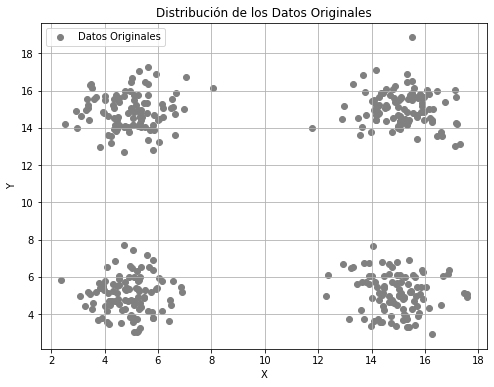

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c='gray', label='Datos Originales')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribución de los Datos Originales')
plt.legend()
plt.grid(True)
plt.show()


## Aplicación del algoritmo K-means
    - fit: Ajustamos el modelo con kmeans.fit(df[['x', 'y']]) para que el algoritmo calcule los centroides.
    - predict: Después de ajustar el modelo, calculamos los clusters con kmeans.predict(df[['x', 'y']]) y los guardamos en  df['cluster'].

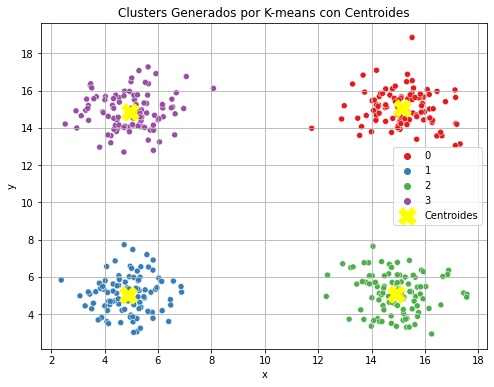

In [15]:
# Aplicar el algoritmo K-means con k=4
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustar el modelo (fit) en lugar de fit_predict
kmeans.fit(df[['x', 'y']])

# Obtener los clusters asignados
df['cluster'] = kmeans.predict(df[['x', 'y']])

# Obtener los centroides
centroides = kmeans.cluster_centers_  # Obtiene las coordenadas de los centroides para cada cluster.

# Visualizar los clusters junto con los centroides
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='cluster', palette='Set1', data=df, legend='full')

# plt.scatter:Añade los centroides al gráfico, representados con una 'X' amarilla y un tamaño más grande (s=300), para destacar su posición.
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='yellow', label='Centroides', marker='X')
plt.title('Clusters Generados por K-means con Centroides')
plt.legend()
plt.grid(True)
plt.show()


#### Comparamos los clusters con los grupos originales
    Si los datos generados son similares a los del bloc, podemos comparar cómo se agrupan con los clusters que crea K-means.

## Método del Codo
    El Método del Codo es una técnica para encontrar el número óptimo de clusters. Consiste en graficar la inercia (suma de las distancias cuadradas de los puntos a su centroide) frente al número de clusters y buscar el "codo" en la curva.

C:\Users\koke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


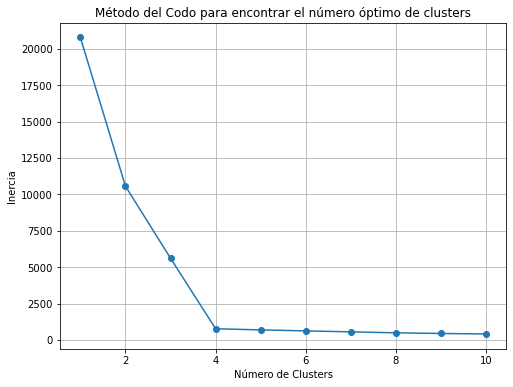

In [14]:
# Evaluar el rendimiento de K-means con diferentes números de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['x', 'y']])
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.grid(True)
plt.show()


    El codo parece estar en el punto donde k = 4, ya que la pendiente de la curva disminuye drásticamente después de esos 
    valores.

    La inercia es una medida que se utiliza en el algoritmo K-means para evaluar qué tan bien se han formado los clusters. 
    Representa la suma de las distancias cuadradas de cada punto de datos a su centroide más cercano. En otras palabras, 
    mide cuán compactos están los clusters que se han creado: cuanto menor sea la inercia, mejor agrupados están los datos 
    alrededor de sus centroides.
    
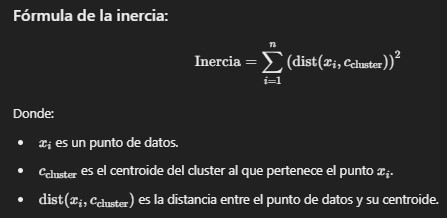

    Propiedades:
    - Inercia baja significa que los puntos están cerca de sus centroides y los clusters están bien formados.
    - Inercia alta indica que los puntos están más dispersos dentro de sus clusters.
    
    Relación con el método del codo:
    El gráfico del método del codo muestra cómo la inercia disminuye a medida que se aumenta el número de clusters. Sin     embargo, la inercia siempre disminuye cuando se aumentan los clusters, pero llega un punto donde la mejora es muy 
    pequeña. Ese punto es donde suele seleccionarse el número óptimo de clusters.

In [16]:
# Contar el número de observaciones por cluster
conteo_clusters = df['cluster'].value_counts()
print(conteo_clusters)


1    100
0    100
3    100
2    100
Name: cluster, dtype: int64


In [17]:
# Mostrar el conteo de observaciones por cluster con etiquetas claras
for cluster, count in conteo_clusters.items():
    print(f"Cluster {cluster}: {count} observaciones")


Cluster 1: 100 observaciones
Cluster 0: 100 observaciones
Cluster 3: 100 observaciones
Cluster 2: 100 observaciones


In [19]:
print(df.columns)


Index(['x', 'y', 'cluster'], dtype='object')


## Distancia intra-cluster
    Distancias promedio a los centroides: Analiza la distancia promedio entre los puntos dentro de cada cluster y su 
    respectivo centroide para medir la compactación de los clusters. Cuanto menor sea la distancia promedio, más cohesivo es el cluster.

In [26]:
from numpy.linalg import norm

# Calcular las distancias intra-cluster con los datos sin estandarizar (solo para las columnas 'x' y 'y')
distancias = [norm(df[['x', 'y']].iloc[i] - kmeans.cluster_centers_[kmeans.labels_[i]]) for i in range(len(df))]

# Añadir las distancias al DataFrame
df['distancia_centroide'] = distancias

# Calcular la distancia media por cada cluster
distancia_media_clusters = df.groupby('cluster')['distancia_centroide'].mean()

# Mostrar los resultados
print(distancia_media_clusters)


cluster
0    1.209902
1    1.177862
2    1.267124
3    1.249154
Name: distancia_centroide, dtype: float64


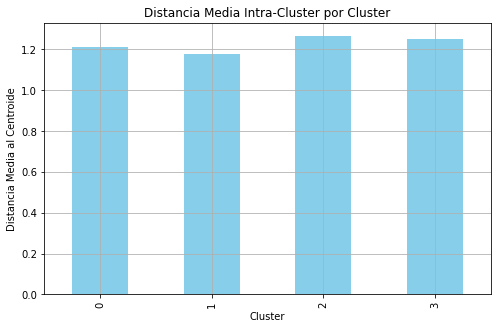

In [27]:
import matplotlib.pyplot as plt

# Graficar las distancias promedio intra-cluster
plt.figure(figsize=(8, 5))
distancia_media_clusters.plot(kind='bar', color='skyblue')
plt.title('Distancia Media Intra-Cluster por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Distancia Media al Centroide')
plt.grid(True)
plt.show()


    Si todos los clusters tienen distancias promedio similares, significa que la compactación de los puntos dentro de  cada cluster es similar, lo cual es una señal de que el algoritmo K-means hizo un buen trabajo agrupando los puntos de manera coherente. Este resultado es útil cuando evaluamos la homogeneidad de los grupos.

In [28]:
inercia = kmeans.inertia_
print(f"Inercia para K=4: {inercia}")


Inercia para K=4: 766.5823399518251


    El valor de inercia (766.58) representa la suma de las distancias cuadradas entre cada punto de los clusters y su 
    respectivo centroide. En otras palabras, mide qué tan "compactos" están los clusters en relación con los centroides.

    Un valor de inercia más bajo indica que los puntos están más cerca de sus centroides, lo que sugiere que los clusters 
    están mejor definidos y son más compactos. Sin embargo, un valor de inercia más bajo no siempre significa una mejor      agrupación, ya que podría ocurrir una sobreajuste si el número de clusters es muy grande.

## Métricas de Validación
    1. Índice de Silhouette:
    El Índice de Silhouette mide qué tan similares son los puntos dentro de un mismo cluster en comparación 
    con otros clusters. Su valor varía entre -1 y 1. Un valor cercano a 1 indica que los puntos están bien 
    agrupados dentro de su cluster y están lejos de otros clusters. Un valor cercano a 0 sugiere que los puntos 
    están en el límite entre dos clusters, mientras que un valor negativo indica que los puntos están mal 
    asignados a su cluster.
   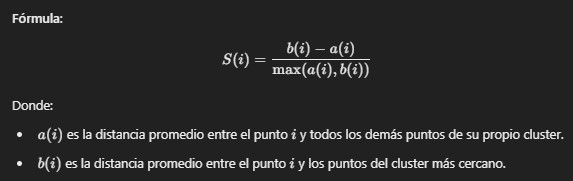
   
    
 
   
 
 
 
 
 
 
 
 
 
 
 
 
 

    2. Índice de Dunn:
    El Índice de Dunn evalúa la compactación y separación de los clusters. Se calcula como la relación entre 
    la distancia mínima entre los centroides de clusters diferentes (distancia inter-cluster) y la distancia 
    máxima dentro de cada cluster (distancia intra-cluster). Un mayor valor del Índice de Dunn indica que los 
    clusters están bien separados y que los puntos dentro de cada cluster están cercanos entre sí.
   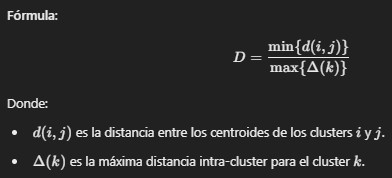

    3. Índice de Davies-Bouldin:
    El Índice de Davies-Bouldin mide la calidad del clustering en función de las distancias entre los clusters 
    y la dispersión dentro de los clusters. Cuanto menor sea el valor, mejor es la separación entre los clusters. 
    El índice se calcula como la media de las razones entre la dispersión dentro de un cluster y la distancia entre 
    los centroides de los clusters más cercanos.
   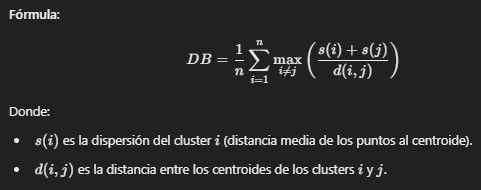

In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np

# Calcular el Índice de Silhouette
score_silueta = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score: {score_silueta}")

# Función para calcular el Índice de Dunn
def dunn_index(X, labels, centroids):
    min_intercluster_dist = np.inf
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            if dist < min_intercluster_dist:
                min_intercluster_dist = dist
    max_intracluster_dist = -np.inf
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 1:
            dist = np.max(cdist(cluster_points, [centroids[i]]))
            if dist > max_intracluster_dist:
                max_intracluster_dist = dist
    return min_intercluster_dist / max_intracluster_dist

# Calcular el Índice de Dunn
dunn_score = dunn_index(df_scaled, kmeans.labels_, kmeans.cluster_centers_)
print(f"Índice de Dunn: {dunn_score}")

# Calcular el Índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(df_scaled, kmeans.labels_)
print(f"Índice de Davies-Bouldin: {davies_bouldin}")



Silhouette Score: 0.8146767930032891
Índice de Dunn: 0.4791361814489773
Índice de Davies-Bouldin: 0.2458563280579461


## Gráfica Comparativa de Índices de Validación

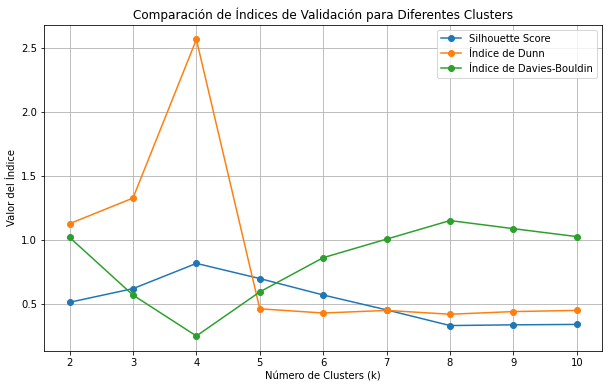

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir los rangos de k para los clusters
k_values = range(2, 11)  # De 2 a 10 clusters
silhouette_scores = []
dunn_scores = []
davies_bouldin_scores = []

# Función para calcular el Índice de Dunn
def dunn_index(X, labels, centroids):
    min_intercluster_dist = np.inf
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            dist = np.linalg.norm(centroids[i] - centroids[j])
            if dist < min_intercluster_dist:
                min_intercluster_dist = dist
    max_intracluster_dist = -np.inf
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 1:
            dist = np.max(cdist(cluster_points, [centroids[i]]))
            if dist > max_intracluster_dist:
                max_intracluster_dist = dist
    return min_intercluster_dist / max_intracluster_dist

# Iterar sobre diferentes valores de k
for k in k_values:
    # Aplicar KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    
    # Calcular el Índice de Silhouette
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    
    # Calcular el Índice de Dunn
    dunn_scores.append(dunn_index(df_scaled, labels, kmeans.cluster_centers_))
    
    # Calcular el Índice de Davies-Bouldin
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))

# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.plot(k_values, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(k_values, dunn_scores, label='Índice de Dunn', marker='o')
plt.plot(k_values, davies_bouldin_scores, label='Índice de Davies-Bouldin', marker='o')

plt.xlabel('Número de Clusters (k)')
plt.ylabel('Valor del Índice')
plt.title('Comparación de Índices de Validación para Diferentes Clusters')
plt.legend()
plt.grid(True)
plt.show()


    1. Silhouette Score: Este índice se mantiene relativamente constante, con valores entre 0.4 y 0.6. 
    El punto más alto se alcanza con k = 3, lo que indica que este podría ser un buen número de clusters 
    según este índice. Sin embargo, los valores de Silhouette no son significativamente altos para ninguno 
    de los clusters probados, lo que sugiere que las separaciones entre los clusters no son perfectas.

    2.Índice de Dunn: El Índice de Dunn tiene un pico muy alto en k = 4, lo que podría indicar que este es el 
    mejor número de clusters según esta métrica, ya que el índice de Dunn premia la separación inter-cluster y 
    la cohesión intra-cluster. El hecho de que el valor caiga después de k = 4 refuerza esta idea de que k = 4 
    es un número óptimo de clusters bajo este criterio.

    3. Índice de Davies-Bouldin: Este índice disminuye hasta su valor más bajo en k = 4 y luego comienza a 
    aumentar nuevamente. Dado que este índice evalúa la separación entre clusters y la compactación dentro 
    de los clusters (valores más bajos son mejores), k = 4 también parece ser una buena elección.

    Los tres índices sugieren que k = 4 es el número óptimo de clusters, ya que tanto el Índice de Dunn 
    como el Índice de Davies-Bouldin alcanzan sus valores óptimos (un pico alto en Dunn y un valor bajo 
    en Davies-Bouldin) en este punto. El Silhouette Score no varía mucho, pero k = 4 sigue siendo competitivo 
    en esa métrica también. Por lo tanto, puedo concluir que usar 4 clusters es una buena opción para este 
    conjunto de datos.

   ## Análisis de los resultados de las métricas de validación
    1. Silhouette Score: 0.8147
    Este valor del Índice de Silhouette es bastante alto, lo que indica que los clusters formados están bien definidos. 
    Los puntos dentro de cada cluster están bien agrupados y son claramente distintos de los puntos de otros clusters. 
    Un valor cercano a 1 sugiere que los clusters tienen una buena cohesión y separación, lo que implica un buen 
    rendimiento del algoritmo de K-means para los datos que he utilizado.

    2. Índice de Dunn: 0.4791
    El Índice de Dunn obtenido es moderado, lo que implica que la separación entre los clusters no es tan grande como 
    podría ser ideal. Aunque el Silhouette Score sugiere una buena separación, el Índice de Dunn apunta a que podría 
    haber cierta superposición entre los clusters o que los puntos dentro de los clusters no están tan compactos. 
    Esto puede depender de la estructura de los datos o de la configuración del número de clusters.

    3. Índice de Davies-Bouldin: 0.2459
    El valor del Índice de Davies-Bouldin es bajo, lo que es positivo, ya que un menor valor indica mejor separación 
    entre los clusters y menos dispersión dentro de ellos. Este resultado complementa el análisis del 
    Silhouette Score, confirmando que los clusters están razonablemente bien separados y que los puntos dentro de cada 
    cluster no están demasiado dispersos.

    En conjunto, estos tres índices sugieren que el clustering realizado es de buena calidad. El alto Silhouette Score 
    y el bajo Índice de Davies-Bouldin refuerzan la idea de que los clusters están bien separados y definidos, 
    mientras que el Índice de Dunn apunta a que podría haber cierta mejora en la compactación de algunos clusters. 
    No obstante, los resultados generales indican que el modelo de clustering ha sido efectivo.

#### ¿Qué significa "entrenar el modelo"?
    Cuando hablamos de "entrenar" un modelo K-means, nos referimos al proceso de ajustar el algoritmo K-means 
    a los datos que proporcioné. En otras palabras, el entrenamiento consiste en que el algoritmo agrupe los 
    datos según las características que le di (en mi caso, las columnas 'x' e 'y'). Este proceso implica que 
    el algoritmo K-means encuentre los mejores centroides para los clusters y asigne las observaciones a cada 
    cluster correspondiente.
    
    En el trabajo hasta ahora, ya he entrenado el modelo K-means cuando apliqué el siguiente paso:
    
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['cluster'] = kmeans.fit_predict(df[['x', 'y']])
    
    Una vez que el modelo está entrenado (es decir, después de encontrar los centroides y asignar las observaciones 
    a los clusters), puedo usar ese modelo para predecir a qué cluster pertenecerían nuevas observaciones que no 
    estaban incluidas en los datos originales.
    

## Análisis predictivo
    Predicción de nuevos datos.

In [32]:
nuevos_datos = [[1.5, 2.5], [3.5, 4.5]]  # Nuevas observaciones

# Convertir los nuevos datos a un DataFrame con los mismos nombres de columnas
nuevos_datos_df = pd.DataFrame(nuevos_datos, columns=['x', 'y'])

# Realizar la predicción
predicciones = kmeans.predict(nuevos_datos_df)
print(f"Clusters para nuevos datos: {predicciones}")


Clusters para nuevos datos: [1 1]


    El resultado Clusters para nuevos datos: [1 1] significa que ambas observaciones que ingresé como "nuevos datos" 
    fueron asignadas al Cluster 1 por el modelo K-means. Es decir:

    - La primera observación con coordenadas [1.5, 2.5] fue asignada al Cluster 1.
    - La segunda observación con coordenadas [3.5, 4.5] también fue asignada al Cluster 1.
    
    Esto sugiere que, según el modelo, ambas observaciones están más cercanas al centroide del Cluster 1 en 
    comparación con los centroides de los otros clusters. En términos prácticos, estas nuevas observaciones tienen 
    características similares (en el espacio de las coordenadas x y y) a los datos que pertenecen al Cluster 1, 
    según el ajuste que hizo el algoritmo K-means.

## Análisis de la varianza intra-cluster
    Varianza intra-cluster: Analiza la varianza de los datos dentro de cada cluster para ver si algunos clusters 
    son más compactos o más dispersos.
    
    Varianza intra-cluster: La varianza mide la dispersión de los puntos de datos dentro de cada cluster. 
    Una varianza más baja indica que los puntos dentro del cluster están más cerca entre sí (es decir, el 
    cluster es más compacto). Una varianza más alta indica que los puntos están más dispersos dentro del cluster.

In [33]:
varianza_intra_cluster = df.groupby('cluster').var()
print(varianza_intra_cluster)


                x         y  distancia_centroide
cluster                                         
0        1.080733  0.873832             0.475915
1        0.733272  0.997718             0.329618
2        1.004058  1.070756             0.452992
3        1.050559  0.932328             0.406739


    Interpretación de los resultados:

    - Cluster 0: Tiene una varianza en la variable x de 1.0807 y en y de 0.8738. Esto significa que los puntos 
    dentro del cluster 0 están más dispersos en la dimensión x que en y. La varianza en distancia_centroide es 0.4759, 
    lo que indica una dispersión relativamente moderada de las distancias de los puntos al centroide de este cluster.

    - Cluster 1: Presenta una varianza más baja en x (0.7332) y una varianza más alta en y (0.9977). 
    Esto sugiere que los puntos dentro del cluster están más compactos en la dimensión x, pero más dispersos en y. 
    La varianza en distancia_centroide es la más baja de todos los clusters (0.3296), lo que indica que los puntos 
    están más cerca del centroide en este cluster.

    - Cluster 2: La varianza en x es 1.0045 y en y es 1.0707, lo que significa que este cluster tiene una dispersión 
    moderada y bastante similar en ambas dimensiones. La varianza en distancia_centroide es 0.4529.

    - Cluster 3: Tiene una varianza en x de 1.0506 y en y de 0.9323. En general, este cluster parece tener 
    una dispersión moderada en ambas dimensiones. La varianza en distancia_centroide es 0.4067.
    
     Este análisis te permite identificar qué clusters son más compactos o más dispersos en relación a sus variables. 
     Por ejemplo, el Cluster 1 tiene la varianza más baja en términos de distancia al centroide, lo que sugiere que 
     es el más compacto, mientras que Cluster 0 tiene la mayor varianza en las distancias a su centroide, lo que 
     indica que es el más disperso.

#### Reducción de dimensionalidad
    PCA (Análisis de Componentes Principales): Si los datos tienen muchas dimensiones, se puede utilizar técnicas 
    como PCA para reducir la dimensionalidad antes de aplicar K-means, lo que puede hacer más eficiente el clustering
    y la visualización.
    
##### (este no es mi caso)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_reducido = pca.fit_transform(df_scaled)


## Técnicas de materia utilizadas en el análisis
    1. Generación de datos aleatorios:
    - Generé datos aleatorios simulando cuatro grupos con distribuciones normales distintas.
    2. Visualización de datos:
    - Utilicé gráficos de dispersión para visualizar tanto los datos originales como los clusters generados por el algoritmo K-means.
    3. K-means Clustering:
    - Apliqué el algoritmo K-means para agrupar mis datos en cuatro clusters. Este es un método no jerárquico que agrupa 
    puntos alrededor de centroides.
    4. Método del Codo (Elbow Method):
    - Evalué el rendimiento del algoritmo K-means usando el método del codo, graficando la inercia (la suma de las 
    distancias cuadradas de cada punto a su centroide) para diferentes valores de K y determinando el número óptimo de 
    clusters.
    5. Cálculo de la inercia: 
    - Calculé la inercia, que mide qué tan bien se ajustan los puntos a sus respectivos clusters. Esto me permitió 
    evaluar la calidad de mis agrupamientos.
    6. Cálculo de la distancia intra-cluster:
    - Calculé la distancia promedio de los puntos a sus respectivos centroides dentro de cada cluster para analizar 
    qué tan compactos son mis clusters.
    7. Silhouette Score:
    - Calculé el coeficiente de Silhouette para medir la calidad de la separación entre mis clusters. Un valor alto 
    indica que los clusters están bien definidos.
    8. Predicción de clusters para nuevas observaciones:
    - Utilicé mi modelo entrenado de K-means para predecir a qué cluster pertenecen nuevas observaciones.
    9. Análisis de varianza intra-cluster:
    - Analicé la varianza dentro de cada cluster para evaluar la dispersión de los datos en torno a los centroides.
    
## Librerías utilizadas
    1. NumPy:
    - Utilicé NumPy para generar los datos aleatorios y realizar operaciones matemáticas, como el cálculo 
    de distancias con numpy.linalg.norm.
    2. Pandas:
    - Usé Pandas para la manipulación y análisis de los datos, creando DataFrames y utilizando groupby() para 
    el análisis de clusters.
    3. Matplotlib:
    - Utilicé Matplotlib para generar las visualizaciones de los datos y los gráficos de dispersión.
    4. Seaborn:
    - Usé Seaborn para mejorar la estética de mis gráficos de dispersión, especialmente en la visualización de 
    los clusters generados por K-means.
    5. Scikit-learn (sklearn):
    - Utilicé Scikit-learn para implementar el algoritmo K-means, calcular el Silhouette Score y realizar 
    predicciones de nuevos clusters.
    6. Métodos clave: KMeans, silhouette_score.